In [1]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('store_unified_summary.csv', encoding='utf-8-sig')

In [12]:
# 1. 제외할 컬럼 정의
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm",
    "participate_energy_eff_support", "participate_high_eff_equip_support",
    "yellow_umbrella_member", "hygiene_certified"
]

# 2. 연속형 숫자형 컬럼만 선택 (INT, FLOAT/DECIMAL)
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. 제외 컬럼 제거 후 잡음 대상 컬럼만 추출
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# 4. 잡음 추가 함수 정의
def add_noise(series, noise_level=0.01):
    """series 값에 표준편차 기반 랜덤 잡음 추가"""
    std = series.std()
    noise = np.random.normal(0, noise_level * std, size=series.shape)
    return series + noise

# 5. 잡음 추가 적용
data_noisy = data.copy()
data_noisy[target_cols] = data_noisy[target_cols].apply(lambda col: add_noise(col, noise_level=0.01))

In [13]:
pd.set_option('display.max_columns', None)
data_noisy.head()

,store_id,owner_id,business_registration_no,industry_code,open_date,summary_year_month,total_sales_amount,weekday_sales_amount,weekend_sales_amount,lunch_sales_ratio,dinner_sales_ratio,transaction_count,weekday_transaction_count,weekend_transaction_count,mom_growth_rate,yoy_growth_rate,sales_cv,avg_transaction_value,weekday_avg_transaction_value,weekend_avg_transaction_value,cash_payment_ratio,card_payment_ratio,revisit_customer_sales_ratio,new_customer_ratio,created_dttm,updated_dttm,last_updated_dttm,electricity_usage_kwh,electricity_bill_amount,gas_usage_m3,water_usage_ton,energy_eff_appliance_ratio,participate_energy_eff_support,participate_high_eff_equip_support,food_waste_kg_per_day,recycle_waste_kg_per_day,yellow_umbrella_member,yellow_umbrella_months,yellow_umbrella_amount,employment_insurance_employees,customer_review_avg_rating,customer_review_positive_ratio,hygiene_certified,origin_price_violation_count,operating_profit,cost_of_goods_sold,total_salary,operating_expenses,rent_expense,other_expenses,operating_profit_ratio,cogs_ratio,salary_ratio,rent_ratio,operating_expense_ratio,cash_payment_ratio_detail,card_payment_ratio_detail,other_payment_ratio,weighted_avg_cash_period,cashflow_cv,avg_account_balance,min_balance_maintenance_ratio,excessive_withdrawal_frequency,rent_payment_compliance_rate,utility_payment_compliance_rate,salary_payment_regularity,tax_payment_integrity
0,101,1101,101-74-60399,56112.309241,2024-11-04,2024-11,2.730516e+06,1.625111e+06,1.235173e+06,31.957628,26.897625,138.087895,88.335238,65.261766,1.231794,NaN,0.142274,16149.898258,15326.191989,18275.634575,15.703891,84.358504,40.005220,53.896738,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,864.711523,110185.722190,498.720150,9.360619,35.593199,0,0,6.713979,5.211478,0,0.451304,770.933164,-0.011908,3.904451,50.335060,0,0.000869,314815.343894,1.456399e+06,355554.475797,2.322498e+06,352941.733290,294435.576311,14.325556,48.458124,15.468668,11.253129,85.659254,53.340216,44.545643,2.174432,1.222011,0.385971,1.679460e+06,60.288355,2.770956,61.983051,72.954880,59.802174,68.857000
1,101,1101,101-80-14374,56112.030343,2024-11-04,2024-12,2.502285e+06,2.005336e+06,1.219375e+06,24.517044,26.671071,197.770836,112.365252,69.478466,13.783229,NaN,0.165091,16615.160738,15680.697617,18786.010699,19.426413,80.564215,50.756749,69.820312,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,1126.505908,132935.186059,692.481232,8.538279,39.524843,0,0,8.268230,9.862639,0,0.345916,-2401.954580,-0.004866,3.792466,59.779934,0,-0.003848,365789.626642,1.476180e+06,545580.310036,3.273694e+06,348802.916137,244064.373934,12.625043,51.678130,17.204554,10.306896,87.260475,64.264919,33.303431,2.501667,0.960660,0.503953,1.979550e+06,42.735483,2.027582,77.936533,46.041492,54.534612,72.707695
2,101,1101,101-90-34754,56111.559344,2024-11-04,2025-01,3.629519e+06,1.734227e+06,1.653260e+06,20.520590,26.172588,185.333262,103.109631,88.668540,12.222685,NaN,0.150058,18741.769858,17654.044621,20785.854796,15.887867,84.081923,50.997055,63.131006,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,1072.212835,128458.655207,743.351163,8.171506,60.665149,0,0,6.872645,5.925704,0,0.677149,291.797737,0.015179,3.861041,57.269682,0,-0.008889,578366.173379,1.951475e+06,580013.404926,3.025069e+06,399884.809199,357438.815823,15.473211,48.160469,15.293048,11.008168,84.605962,63.454556,32.721822,4.008272,1.024086,0.576844,2.286325e+06,38.372452,1.019222,67.854554,62.091129,75.078704,89.280197
3,101,1101,101-04-50959,56112.528761,2024-11-04,2025-02,3.550024e+06,2.329881e+06,1.675753e+06,26.354895,33.822756,198.908759,95.952551,98.550994,13.243226,NaN,0.171969,20592.079310,19403.359499,23199.652870,18.585540,81.453001,49.767835,60.074658,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,899.880116,105410.666194,626.044494,8.139937,37.696016,0,0,5.509311,6.255273,0,0.349317,-3603.799407,-0.000170,3.250934,51.117648,0,-0.009380,583085.738479,1.953893e+06,762626.059422,3.72

In [14]:
# ==============================
# 패키지 불러오기
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ==============================
# 1. 스케일링
# ==============================
# R: X_df <- df[, 11:18]; X_df <- X_df[, -1]
data_noisy2 = data_noisy.drop(data_noisy.columns[[0, 1]], axis=1)

# 1. 숫자형 컬럼만 선택
numeric_cols = data_noisy2.select_dtypes(include=["int64", "float64"]).columns

# exclude_cols 제거
target_cols = [col for col in numeric_cols if col not in exclude_cols]

# 표준화 수행
scaler = StandardScaler()
standardized_X = pd.DataFrame(
    scaler.fit_transform(data_noisy[target_cols]),
    columns=target_cols
)

# 원본 데이터에 반영하고 싶으면
data_standardized = data_noisy.copy()
data_standardized[target_cols] = standardized_X

In [15]:
data_standardized

,store_id,owner_id,business_registration_no,industry_code,open_date,summary_year_month,total_sales_amount,weekday_sales_amount,weekend_sales_amount,lunch_sales_ratio,dinner_sales_ratio,transaction_count,weekday_transaction_count,weekend_transaction_count,mom_growth_rate,yoy_growth_rate,sales_cv,avg_transaction_value,weekday_avg_transaction_value,weekend_avg_transaction_value,cash_payment_ratio,card_payment_ratio,revisit_customer_sales_ratio,new_customer_ratio,created_dttm,updated_dttm,last_updated_dttm,electricity_usage_kwh,electricity_bill_amount,gas_usage_m3,water_usage_ton,energy_eff_appliance_ratio,participate_energy_eff_support,participate_high_eff_equip_support,food_waste_kg_per_day,recycle_waste_kg_per_day,yellow_umbrella_member,yellow_umbrella_months,yellow_umbrella_amount,employment_insurance_employees,customer_review_avg_rating,customer_review_positive_ratio,hygiene_certified,origin_price_violation_count,operating_profit,cost_of_goods_sold,total_salary,operating_expenses,rent_expense,other_expenses,operating_profit_ratio,cogs_ratio,salary_ratio,rent_ratio,operating_expense_ratio,cash_payment_ratio_detail,card_payment_ratio_detail,other_payment_ratio,weighted_avg_cash_period,cashflow_cv,avg_account_balance,min_balance_maintenance_ratio,excessive_withdrawal_frequency,rent_payment_compliance_rate,utility_payment_compliance_rate,salary_payment_regularity,tax_payment_integrity
0,101,1101,101-74-60399,-0.500655,2024-11-04,2024-11,-0.589084,-0.594532,-0.554903,0.418394,-0.169774,-0.643984,-0.671528,-0.572518,0.230566,NaN,0.188253,-0.030450,-0.009236,-0.006612,-0.755481,0.761925,-1.393515,0.339510,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-1.209127,-1.132406,-0.411935,-1.434328,-1.461870,0,0,-0.775986,-0.951856,0,-0.464916,-0.648171,-0.473982,-0.075644,-0.722783,0,-0.277099,-0.588774,-0.575218,-0.613703,-0.589381,-0.569514,-0.577297,-0.707883,0.379512,-0.733573,0.969277,0.705027,-0.340229,0.453578,-1.360882,0.235236,-0.817788,-0.555848,-0.136994,0.202617,-0.939919,0.101712,-0.618701,-0.881310
1,101,1101,101-80-14374,-0.507163,2024-11-04,2024-12,-0.597086,-0.573255,-0.556350,-0.541405,-0.192134,-0.613631,-0.650581,-0.567489,3.436894,NaN,0.545524,0.036234,0.044838,0.058708,-0.386938,0.386299,-0.592139,1.498479,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-0.879449,-0.896418,0.101162,-1.527835,-1.198324,0,0,-0.511997,-0.146422,0,-0.467921,-0.665964,-0.465654,-0.306130,0.116535,0,-0.285006,-0.579918,-0.573748,-0.572135,-0.547876,-0.571012,-0.600422,-1.082668,1.627636,0.441487,0.136144,1.057976,1.181115,-1.098192,-0.796591,-1.225118,-0.371994,-0.544801,-1.042431,-0.141150,0.123981,-1.632856,-0.944971,-0.545874
2,101,1101,101-90-34754,-0.518154,2024-11-04,2025-01,-0.557568,-0.588426,-0.516610,-1.056928,-0.241330,-0.619957,-0.658649,-0.544605,3.038245,NaN,0.310137,0.341036,0.345840,0.314655,-0.737266,0.734544,-0.574227,1.011610,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-0.947821,-0.942854,0.235871,-1.569541,0.218755,0,0,-0.749037,-0.828174,0,-0.458477,-0.650858,-0.441949,-0.164989,-0.106539,0,-0.293453,-0.542984,-0.538420,-0.564603,-0.558725,-0.552523,-0.548372,-0.454945,0.264136,-0.852454,0.753596,0.472855,1.068266,-1.178472,1.801432,-0.870715,-0.096573,-0.533508,-1.267491,-0.607457,-0.548362,-0.598456,0.327517,0.897765
3,101,1101,101-04-50959,-0.495533,2024-11-04,2025-02,-0.560354,-0.555094,-0.514550,-0.304331,0.513689,-0.613053,-0.664888,-0.532819,3.298947,NaN,0.653213,0.606235,0.612669,0.623581,-0.470187,0.474287,-0.665848,0.789159,2025-09-08 00:21:10,2025-09-08 00:21:18,2025-09-08 00:21:10,-1.164839,-1.181939,-0.074768,-1.573130,-1.320914,0,0,-0.980599,-0.771103,0,-0.467824,-0.672704,-0.460101,-1.420706,-0.653239,0,-0.294277,-0.542164,-0.538240,-0.524656,-0.528008,-0.567155,-0.517678,-0.607923,0.521664,0.682972,-0.976064,0.609282,0.069732,-0.090057,0.179691,-0.055922,2.738993,-0.523219,-0.838882,-0.064198,-0.652900,0.698841,-1.359786,-1.240178
4,101,1101,101-31-21926,-0.523941

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# ===============================
# 1) 제외할 컬럼 정의 (id, 날짜, boolean)
# ===============================
exclude_cols = [
    "store_id", "owner_id",
    "open_date", "summary_year_month", "created_dttm", "updated_dttm", "last_updated_dttm"
]

# ===============================
# 2) 숫자형 컬럼만 선택 후 exclude_cols 제거
# ===============================
numeric_cols = data_standardized.select_dtypes(include=["int64", "float64"]).columns
validation_cols = [col for col in numeric_cols if col not in exclude_cols]
X_validation = data_standardized[validation_cols]

# ===============================
# 3) NaN / Inf 제거
# ===============================
X_validation = X_validation.replace([np.inf, -np.inf], np.nan).dropna()

# ===============================
# 4) 분산 거의 0 컬럼 제거
# ===============================
selector = VarianceThreshold(threshold=1e-5)
X_validation_filtered = pd.DataFrame(
    selector.fit_transform(X_validation),
    columns=X_validation.columns[selector.get_support()]
)

# ===============================
# 5) 상관 높은 컬럼 제거 (선택적으로)
# ===============================
corr_matrix = X_validation_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.999)]
X_validation_filtered = X_validation_filtered.drop(columns=to_drop)

# ===============================
# 6) Bartlett's Test
# ===============================

print("Data shape after preprocessing:", X_validation_filtered.shape)
chi_square_value, p_value = calculate_bartlett_sphericity(X_validation_filtered)
print("Bartlett’s test: Chi-square =", chi_square_value, " p-value =", p_value)

# ===============================
# 7) KMO Test
# ===============================
kmo_all, kmo_model = calculate_kmo(X_validation_filtered)
print("KMO Model:", kmo_model)

Data shape after preprocessing: (392, 50)
Bartlett’s test: Chi-square = 43324.63137446618  p-value = 0.0
KMO Model: 0.8567436329047834


/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Eigenvalues: [1.84201909e+01 8.55828637e+00 5.70589074e+00 2.73858677e+00
 1.97386715e+00 1.55665414e+00 1.28644289e+00 1.06683176e+00
 1.02499892e+00 9.43959142e-01 8.73708591e-01 8.25280755e-01
 7.91749310e-01 7.82739374e-01 7.27809185e-01 6.93289092e-01
 6.88150766e-01 6.64930988e-01 6.44682417e-01 5.98203037e-01
 5.55266467e-01 5.27357446e-01 4.85504491e-01 4.17839256e-01
 3.75168466e-01 3.38816771e-01 3.06585555e-01 2.51434291e-01
 2.01504054e-01 1.78706275e-01 1.65043100e-01 1.55919442e-01
 1.48659863e-01 1.08212641e-01 5.56819319e-02 4.01883355e-02
 3.50775077e-02 2.75328898e-02 2.01863375e-02 1.32709238e-02
 7.26192752e-03 7.04532836e-03 6.19275054e-03 3.14850800e-03
 1.03525115e-03 2.40043749e-04 1.15564887e-04 1.06133292e-04
 1.03210990e-04 9.96092210e-05 9.47112597e-05 9.31884862e-05
 9.13713044e-05 8.46992191e-05 7.93813802e-05]


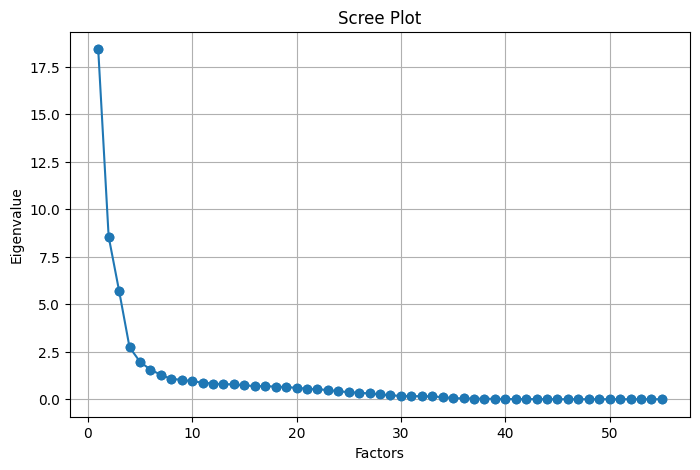

In [9]:

# ==============================
# 3. 요인 개수 판단
# ==============================
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# 최대 요인 개수 = 변수 개수
fa = FactorAnalyzer(n_factors=standardized_X.shape[1], rotation=None)
fa.fit(standardized_X)

# 고유값 확인
ev, v = fa.get_eigenvalues()
print("Eigenvalues:", ev)

# Scree plot
plt.figure(figsize=(8,5))
plt.scatter(range(1, standardized_X.shape[1]+1), ev)
plt.plot(range(1, standardized_X.shape[1]+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [10]:

# ==============================
# 4. 요인분석 수행 (예: n_factors=5)
# ==============================
fa2 = FactorAnalyzer(n_factors=5, rotation="varimax")
fa2.fit(X_validation_filtered)

# 요인적재량
loadings2 = pd.DataFrame(fa2.loadings_, index=X_validation_filtered.columns)
print("Factor Loadings:\n", loadings2)

# 공통성
communalities2 = pd.DataFrame(fa2.get_communalities(), index=X_validation_filtered.columns, columns=["Communality"])
print(communalities2)

/Users/ahnsaeyeon/guide-on/ai/guide-on-ai/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor Loadings:
                                         0         1             2         3  \
industry_code                    0.116310  0.022963 -9.640529e-01  0.069735   
total_sales_amount               0.971819  0.173000  4.838528e-02  0.133339   
weekday_sales_amount             0.961075  0.194722  1.032497e-01  0.108265   
weekend_sales_amount             0.966336  0.136193 -4.218035e-02  0.173239   
lunch_sales_ratio               -0.132506 -0.125438  7.643623e-01 -0.245154   
dinner_sales_ratio              -0.052076  0.248458  8.465841e-01 -0.057871   
transaction_count                0.882534  0.103590 -2.942583e-01  0.242585   
weekday_transaction_count        0.911662  0.130722 -2.326737e-01  0.222502   
weekend_transaction_count        0.821123  0.065381 -3.671100e-01  0.261846   
mom_growth_rate                  0.421845  0.361806 -1.016526e-01  0.459960   
yoy_growth_rate                  0.358928 -0.012385 -1.762940e-01  0.495354   
sales_cv                        -0